In [1]:
# CARGA DE DATASET Y LIBRERÍAS
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/Datos_abiertos_cepre.csv')
df.head(6)

,IDHASH,COLEGIO,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,COLEGIO_ANIO_EGRESO,ESPECIALIDAD,ANIO_POSTULA,CICLO_POSTULA,...,ANIO_NACIMIENTO,NACIMIENTO_PAIS,NACIMIENTO_DEPA,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,CALIF_FINAL,INGRESO,MODO_INGRESO,FECHA_CORTE
0,54CB3EB25FC93C1FAC691E2351D8E561EA7A5C1CC0C840...,Corazón de Jesús,CALLAO,CALLAO,CALLAO,PERU,2013,SIN ESPECIALIDAD,2016,2,...,1997,Peru,CALLAO,CALLAO,CALLAO,MASCULINO,4.491,NO,SIN INGRESO,20240529
1,5A18BE74478BB8BAA3D1E1B0830AF43D883E55471BEC50...,Aurelio miro quesada sosa,LIMA,LIMA,LA MOLINA,PERU,2013,SIN ESPECIALIDAD,2016,2,...,1997,Peru,LIMA,LIMA,LIMA,FEMENINO,2.045,NO,SIN INGRESO,20240529
2,5BF8EBFFA46ED932AE6135BD683BB792AC8E4B9C068DAD...,Daniel Alomia Robles,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,2015,SIN ESPECIALIDAD,2016,2,...,2000,Peru,LIMA,LIMA,INDEPENDENCIA,MASCULINO,0.642,NO,SIN INGRESO,20240529
3,3CCEB93417E4F004B107B6389797B7948BA7F051FCB405...,alfonso ugarte,LIMA,LIMA,LURIGANCHO,PERU,2015,SIN ESPECIALIDAD,2016,2,...,1999,Peru,LIMA,LIMA,SAN JUAN DE LURIGANCHO,FEMENINO,0.535,NO,SIN INGRESO,20240529
4,909D65D35B90A659D366B3F8B2C467594E550452ACBA6C...,pamer,LIMA,LIMA,PUENTE PIEDRA,PERU,2015,SIN ESPECIALIDAD,2016,2,...,1999,Peru,LIMA,LIMA,PUENTE PIEDRA,MASCULINO,0.591,NO,SIN INGRESO,20240529
5,3566BB55D095ABB6EA4F0FFE2B5754848ADE1FE3B4F69F...,2095,LIMA,LIMA,LOS OLIVOS,PERU,2014,SIN ESPECIALIDAD,2016,2,...,1997,Peru,LIMA,LIMA,LIMA,FEMENINO,0.369,NO,SIN INGRESO,20240529


In [2]:
# AGREGAR COLUMNA 'CICLO' PARA CONSIDERAR EL DATO EN UNA SOLA COLUMNA
df['CICLO'] = df[['ANIO_POSTULA', 'CICLO_POSTULA']].astype(str).agg('-'.join, axis=1)
df['CICLO']

,CICLO
0,2016-2
1,2016-2
2,2016-2
3,2016-2
4,2016-2
...,...
33804,2023-2
33805,2023-2
33806,2023-2
33807,2023-2


In [3]:
# REASIGNAMOS EL NOMBRE DE LA COLUMNA 'IDHASH' POR EL DE 'ALUMNOS' Y VALIDAMOS LA INFORMACIÓN DEL DF CON LA ACTUALIZACIÓN HASTA EL MOMENTO
df.rename(columns={'IDHASH': 'ALUMNOS'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33809 entries, 0 to 33808
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALUMNOS              33809 non-null  object 
 1   COLEGIO              33809 non-null  object 
 2   COLEGIO_DEPA         33809 non-null  object 
 3   COLEGIO_PROV         33809 non-null  object 
 4   COLEGIO_DIST         33809 non-null  object 
 5   COLEGIO_PAIS         33809 non-null  object 
 6   COLEGIO_ANIO_EGRESO  33809 non-null  int64  
 7   ESPECIALIDAD         33809 non-null  object 
 8   ANIO_POSTULA         33809 non-null  int64  
 9   CICLO_POSTULA        33809 non-null  int64  
 10  DOMICILIO_DEPA       33809 non-null  object 
 11  DOMICILIO_PROV       33809 non-null  object 
 12  DOMICILIO_DIST       33809 non-null  object 
 13  ANIO_NACIMIENTO      33809 non-null  int64  
 14  NACIMIENTO_PAIS      33809 non-null  object 
 15  NACIMIENTO_DEPA      33809 non-null 

In [4]:
# CONTABILIZAR ALUMNOS INGRESANTES (ORDINARIO + DIRECTO) POR CICLO
gdf = df[df['INGRESO']=='SI'].groupby('CICLO')[['ALUMNOS']].count()
gdf

,ALUMNOS
CICLO,
2016-2,399
2017-1,410
2017-2,268
2018-1,409
2018-2,380
2019-1,454
2019-2,476
2020-1,426
2021-1,369


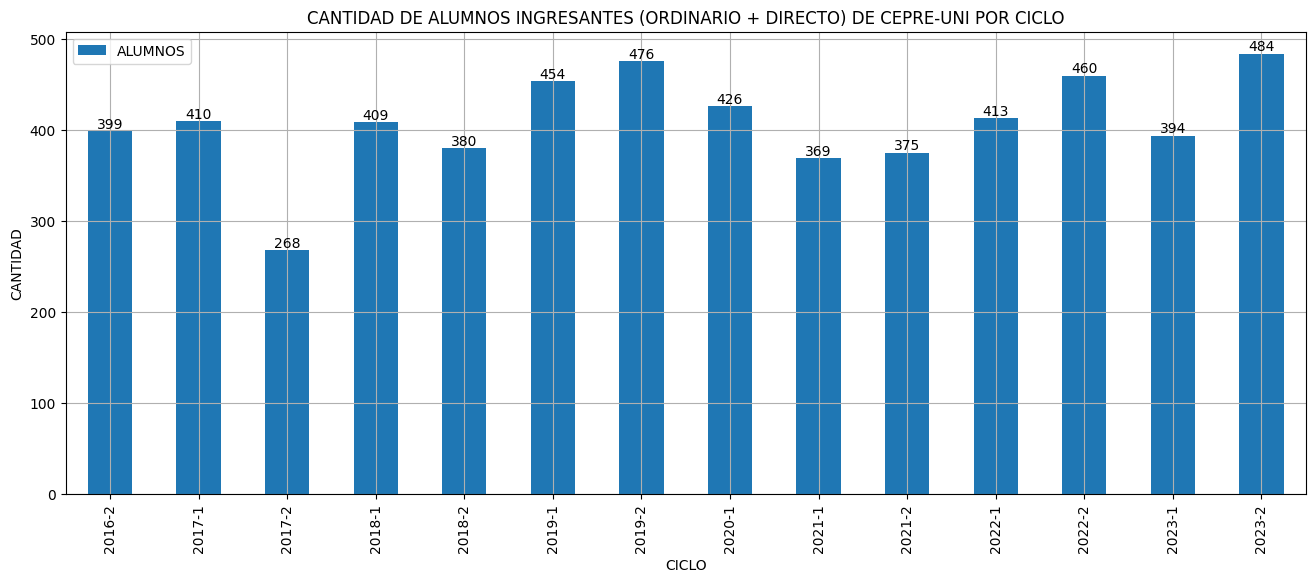

In [5]:
# GRAFICAMOS EL DF RESULTADO
ax_gdf=gdf.plot(kind='bar',figsize=(16,6),xlabel='CICLO',ylabel='CANTIDAD',title='CANTIDAD DE ALUMNOS INGRESANTES (ORDINARIO + DIRECTO) DE CEPRE-UNI POR CICLO',grid=True)
for container in ax_gdf.containers:
    ax_gdf.bar_label(container)

In [6]:
# CONTABILIZAR ALUMNOS INGRESANTES POR CEPRE-UNI (DIRECTO) POR CICLO
gdf2 = df[(df['INGRESO']=='SI') & (df['MODO_INGRESO']=='DIRECTO')].groupby('CICLO')[['ALUMNOS']].count()
gdf2

,ALUMNOS
CICLO,
2016-2,254
2017-1,275
2017-2,268
2018-1,253
2018-2,241
2019-1,270
2019-2,268
2020-1,250
2021-1,225


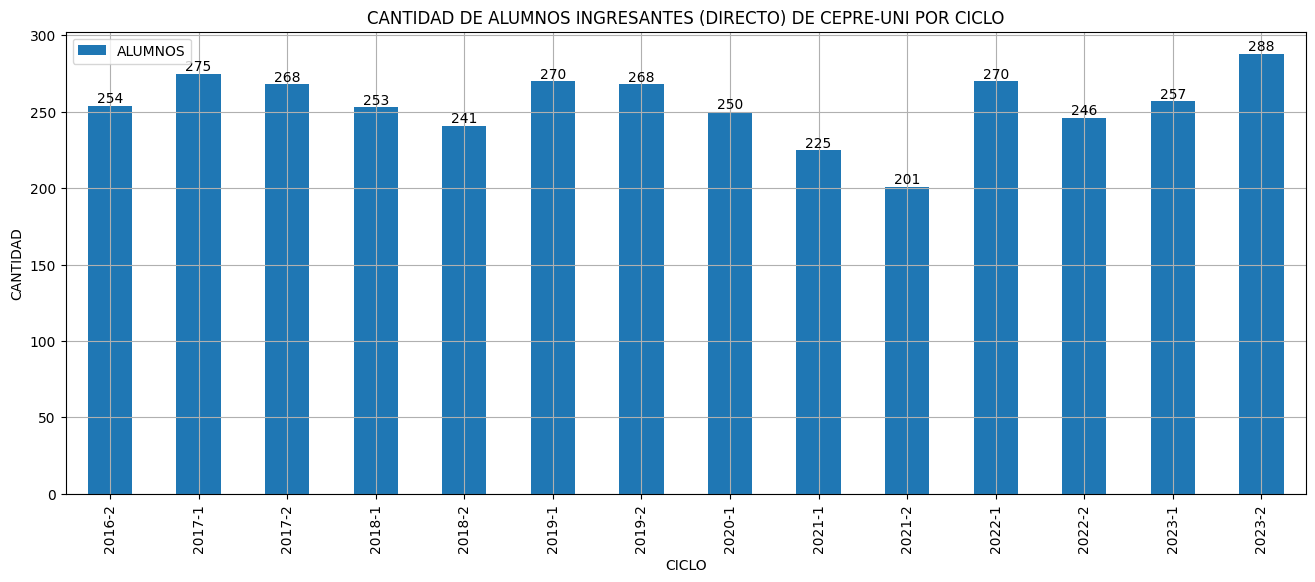

In [7]:
# GRAFICAMOS EL DF RESULTADO
ax_gdf2=gdf2.plot(kind='bar',figsize=(16,6),xlabel='CICLO',ylabel='CANTIDAD',title='CANTIDAD DE ALUMNOS INGRESANTES (DIRECTO) DE CEPRE-UNI POR CICLO',grid=True)
for container in ax_gdf2.containers:
    ax_gdf2.bar_label(container)

In [8]:
# CONTABILIZAR ALUMNOS INGRESANTES POR CEPRE-UNI DISTRIBUIDOS POR DEPARTAMENTO DE DOMICILIO POR CICLO
gdf3 = df[(df['INGRESO']=='SI') & (df['MODO_INGRESO']=='DIRECTO')].groupby('DOMICILIO_DEPA')[['ALUMNOS']].count()
gdf3

,ALUMNOS
DOMICILIO_DEPA,
AMAZONAS,3
ANCASH,15
APURIMAC,6
AREQUIPA,3
AYACUCHO,10
CAJAMARCA,11
CALLAO,171
CUSCO,1
HUANCAVELICA,3


In [9]:
# CONTABILIZAR ALUMNOS INGRESANTES POR CEPRE-UNI DISTRIBUIDOS POR DEPARTAMENTO DE COLEGIO POR CICLO
gdf4 = df[(df['INGRESO']=='SI') & (df['MODO_INGRESO']=='DIRECTO')].groupby('COLEGIO_DEPA')[['ALUMNOS']].count()
gdf4

,ALUMNOS
COLEGIO_DEPA,
AMAZONAS,34
ANCASH,83
APURIMAC,34
AREQUIPA,10
AYACUCHO,48
CAJAMARCA,32
CALLAO,137
CUSCO,13
HUANCAVELICA,14


In [10]:
# CONTABILIZAR ALUMNOS INGRESANTES POR CEPRE-UNI DISTRIBUIDOS POR DEPARTAMENTO DE NACIMIENTO POR CICLO
gdf5 = df[(df['INGRESO']=='SI') & (df['MODO_INGRESO']=='DIRECTO')].groupby('NACIMIENTO_DEPA')[['ALUMNOS']].count()
gdf5

,ALUMNOS
NACIMIENTO_DEPA,
AMAZONAS,43
ANCASH,115
APURIMAC,41
AREQUIPA,21
AYACUCHO,63
CAJAMARCA,50
CALLAO,151
CUSCO,20
HUANCAVELICA,26


In [12]:
# PARA IDENTIFICAR Y ANALIZAR DATOS DE ALUMNOS CON DOMICILIO, COLEGIO Y NACIMIENTO, SE AGRUPARÁN LOS DEPARTAMENTOS POR REGIONES, 'NO', 'NE', 'NC', 'SC', 'SE', 'SO', 'LC', 'I'

df2 = df

# DELIMITACIÓN DE REGIONES GEOGRÁFICAMENTE SEGÚN CRITERIO DE CERCANÍA DE DEPARTAMENTOS
data=[
       ['TUMBES', 'PIURA', 'LAMBAYEQUE', 'CAJAMARCA'],     #NO
       ['AMAZONAS', 'LORETO', 'SAN MARTIN', 'UCAYALI'],    #NE
       ['LA LIBERTAD', 'ANCASH', 'HUANUCO', 'PASCO'],      #NC
       ['JUNIN', 'HUANCAVELICA', 'AYACUCHO', 'APURIMAC'],  #SC
       ['CUSCO', 'MADRE DE DIOS', 'PUNO'],                 #SE
       ['ICA', 'AREQUIPA', 'MOQUEGUA', 'TACNA'],           #SO
       ['CALLAO', 'LIMA']                                  #LC
     ]

def asignar_region(departamento):
  if departamento in data[0]:
    return 'NO'
  elif departamento in data[1]:
    return 'NE'
  elif departamento in data[2]:
    return 'NC'
  elif departamento in data[3]:
    return 'SC'
  elif departamento in data[4]:
    return 'SE'
  elif departamento in data[5]:
    return 'SO'
  elif departamento in data[6]:
      return 'LC'
  else:
    return 'I'

df2['DOMICILIO_ZONA'] = df['DOMICILIO_DEPA'].apply(asignar_region)

df2['COLEGIO_ZONA'] = df['COLEGIO_DEPA'].apply(asignar_region)

df2['NACIMIENTO_ZONA'] = df['NACIMIENTO_DEPA'].apply(asignar_region)

# DOMICILIO

In [13]:
# AGRUPACIÓN DE ALUMNOS POR 'DOMICILIO_ZONA' POR CICLO
df2.groupby(['CICLO','DOMICILIO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                                     
DOMICILIO_ZONA      LC    NC    NE    NO     SC    SE    SO
CICLO                                                      
2016-2          2274.0   NaN   NaN   NaN    NaN   NaN   NaN
2017-1          2077.0   NaN   NaN   NaN    NaN   NaN   NaN
2017-2          2240.0   NaN   NaN   NaN    NaN   NaN   NaN
2018-1          2141.0   NaN   NaN   NaN    NaN   NaN   NaN
2018-2          2567.0   NaN   NaN   NaN    NaN   NaN   NaN
2019-1          2608.0   NaN   NaN   NaN    NaN   NaN   NaN
2019-2          2742.0   NaN   NaN   NaN    NaN   NaN   NaN
2020-1          2731.0   NaN   NaN   NaN    NaN   NaN   NaN
2021-1          2980.0   NaN   NaN   NaN    NaN   NaN   NaN
2021-2          1925.0  57.0  19.0  34.0   99.0  31.0  51.0
2022-1          1958.0  69.0  14.0  33.0  115.0  42.0  47.0
2022-2          2105.0  55.0  27.0  32.0   81.0  19.0  47.0
2023-1          1927.0  30.0   8.0  10.0   42.0   7.0  27.0
2023-2          2399.0  33.0  12.0  10.0   47.0  10.0  27.0

In [14]:
# AGRUPACIÓN DE ALUMNOS INGRESANTES POR 'DOMICILIO_ZONA' POR CICLO
df2[df2['INGRESO']=='SI'].groupby(['CICLO','DOMICILIO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                                 
DOMICILIO_ZONA      LC    NC   NE    NO    SC   SE   SO
CICLO                                                  
2016-2           399.0   NaN  NaN   NaN   NaN  NaN  NaN
2017-1           410.0   NaN  NaN   NaN   NaN  NaN  NaN
2017-2           268.0   NaN  NaN   NaN   NaN  NaN  NaN
2018-1           409.0   NaN  NaN   NaN   NaN  NaN  NaN
2018-2           380.0   NaN  NaN   NaN   NaN  NaN  NaN
2019-1           454.0   NaN  NaN   NaN   NaN  NaN  NaN
2019-2           476.0   NaN  NaN   NaN   NaN  NaN  NaN
2020-1           426.0   NaN  NaN   NaN   NaN  NaN  NaN
2021-1           369.0   NaN  NaN   NaN   NaN  NaN  NaN
2021-2           331.0  10.0  3.0   5.0  20.0  1.0  5.0
2022-1           354.0  11.0  NaN  12.0  23.0  6.0  7.0
2022-2           404.0   9.0  2.0   9.0  23.0  4.0  9.0
2023-1           370.0   6.0  1.0   4.0   7.0  1.0  5.0
2023-2           459.0   6.0  NaN   2.0  11.0  2.0  4.0

In [15]:
# AGRUPACIÓN DE ALUMNOS INGRESANTES DIRECTO POR 'DOMICILIO_ZONA' POR CICLO
df2[(df2['INGRESO']=='SI') & (df2['MODO_INGRESO']=='DIRECTO')].groupby(['CICLO','DOMICILIO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                               
DOMICILIO_ZONA      LC   NC   NE   NO    SC   SE   SO
CICLO                                                
2016-2           254.0  NaN  NaN  NaN   NaN  NaN  NaN
2017-1           275.0  NaN  NaN  NaN   NaN  NaN  NaN
2017-2           268.0  NaN  NaN  NaN   NaN  NaN  NaN
2018-1           253.0  NaN  NaN  NaN   NaN  NaN  NaN
2018-2           241.0  NaN  NaN  NaN   NaN  NaN  NaN
2019-1           270.0  NaN  NaN  NaN   NaN  NaN  NaN
2019-2           268.0  NaN  NaN  NaN   NaN  NaN  NaN
2020-1           250.0  NaN  NaN  NaN   NaN  NaN  NaN
2021-1           225.0  NaN  NaN  NaN   NaN  NaN  NaN
2021-2           180.0  4.0  1.0  4.0   9.0  1.0  2.0
2022-1           235.0  8.0  NaN  9.0  12.0  NaN  6.0
2022-2           217.0  4.0  2.0  6.0  12.0  1.0  4.0
2023-1           248.0  4.0  1.0  1.0   2.0  NaN  1.0
2023-2           274.0  2.0  NaN  1.0   7.0  2.0  2.0

# COLEGIO

In [16]:
# AGRUPACIÓN DE ALUMNOS POR 'COLEGIO_ZONA' POR CICLO
df2.groupby(['CICLO','COLEGIO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                          
COLEGIO_ZONA      LC   NC  NE  NO   SC  SE  SO
CICLO                                         
2016-2          1840  108  46  44  161  31  44
2017-1          1672   97  48  43  154  34  29
2017-2          1826  102  55  46  154  27  30
2018-1          1747   94  48  38  162  24  28
2018-2          2111  109  59  44  172  35  37
2019-1          2174  115  56  44  156  31  32
2019-2          2287  109  55  50  164  34  43
2020-1          2324  104  60  38  143  24  38
2021-1          2525  115  48  57  152  36  47
2021-2          1810   84  47  51  125  40  59
2022-1          1865   84  36  49  148  45  51
2022-2          1978   86  48  51  123  29  51
2023-1          1774   64  35  37   88  23  30
2023-2          2201   76  42  38  108  34  39

In [17]:
# AGRUPACIÓN DE ALUMNOS INGRESANTES POR 'COLEGIO_ZONA' POR CICLO
df2[df2['INGRESO']=='SI'].groupby(['CICLO','COLEGIO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                       
COLEGIO_ZONA      LC  NC  NE  NO  SC SE  SO
CICLO                                      
2016-2           332  19   5   7  28  1   7
2017-1           334  23   8   9  22  8   6
2017-2           217  14   6   6  16  4   5
2018-1           341  21   9   2  25  5   6
2018-2           315  19   4   1  32  4   5
2019-1           377  20  10  12  26  7   2
2019-2           393  24   6   6  34  5   8
2020-1           358  12   8   8  26  3  11
2021-1           307  15   3   9  30  2   3
2021-2           305  15  10  10  24  4   7
2022-1           347  12   1  13  28  6   6
2022-2           381  15   5  13  34  5   7
2023-1           332  19   4  10  21  3   5
2023-2           419  13   5   4  28  8   7

In [18]:
# AGRUPACIÓN DE ALUMNOS INGRESANTES DIRECTO POR 'COLEGIO_ZONA' POR CICLO
df2[(df2['INGRESO']=='SI') & (df2['MODO_INGRESO']=='DIRECTO')].groupby(['CICLO','COLEGIO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                                 
COLEGIO_ZONA      LC    NC   NE    NO    SC   SE   SO
CICLO                                                
2016-2         218.0  15.0  1.0   4.0  12.0  NaN  4.0
2017-1         226.0  18.0  4.0   6.0  14.0  3.0  4.0
2017-2         217.0  14.0  6.0   6.0  16.0  4.0  5.0
2018-1         217.0  11.0  6.0   1.0  14.0  1.0  3.0
2018-2         201.0  11.0  3.0   1.0  18.0  3.0  4.0
2019-1         229.0   9.0  7.0   6.0  15.0  3.0  1.0
2019-2         226.0  16.0  3.0   2.0  17.0  2.0  2.0
2020-1         209.0   9.0  5.0   2.0  19.0  1.0  5.0
2021-1         195.0   7.0  3.0   3.0  13.0  1.0  3.0
2021-2         160.0   8.0  7.0   7.0  13.0  3.0  3.0
2022-1         230.0   9.0  NaN  10.0  16.0  NaN  5.0
2022-2         209.0   6.0  5.0   7.0  14.0  1.0  4.0
2023-1         220.0  14.0  2.0   6.0  12.0  2.0  1.0
2023-2         253.0   6.0  4.0   2.0  13.0  7.0  3.0

# NACIMIENTO

In [19]:
# AGRUPACIÓN DE ALUMNOS POR 'NACIMIENTO_ZONA' POR CICLO
df2.groupby(['CICLO','NACIMIENTO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                                
NACIMIENTO_ZONA       I    LC   NC  NE  NO   SC  SE  SO
CICLO                                                  
2016-2               21  1618  159  62  72  230  52  60
2017-1               16  1477  144  63  63  215  50  49
2017-2               17  1635  141  67  80  211  40  49
2018-1               21  1552  146  54  62  222  47  37
2018-2               28  1879  173  69  81  233  50  54
2019-1               27  1928  187  71  70  236  44  45
2019-2               28  2032  181  64  80  240  56  61
2020-1               21  2072  177  70  77  210  49  55
2021-1                9  2273  188  69  92  219  56  74
2021-2               14  1635  121  58  81  177  52  78
2022-1               22  1738  112  41  71  175  52  67
2022-2               21  1811  131  64  79  161  39  60
2023-1               10  1637   98  56  55  126  30  39
2023-2               13  2044  116  67  63  150  43  42

In [20]:
# AGRUPACIÓN DE ALUMNOS INGRESANTES POR 'NACIMIENTO_ZONA' POR CICLO
df2[df2['INGRESO']=='SI'].groupby(['CICLO','NACIMIENTO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                                           
NACIMIENTO_ZONA       I     LC    NC    NE    NO    SC    SE    SO
CICLO                                                             
2016-2              3.0  279.0  29.0  12.0  12.0  47.0   8.0   9.0
2017-1              3.0  292.0  29.0  10.0  12.0  39.0  15.0  10.0
2017-2              2.0  197.0  15.0  12.0  13.0  18.0   4.0   7.0
2018-1              1.0  305.0  31.0  11.0   5.0  36.0  13.0   7.0
2018-2              3.0  285.0  29.0   5.0   6.0  40.0   4.0   8.0
2019-1              3.0  327.0  32.0  16.0  18.0  45.0   6.0   7.0
2019-2              2.0  353.0  39.0   5.0   9.0  45.0  10.0  13.0
2020-1              5.0  325.0  21.0   9.0  12.0  34.0   9.0  11.0
2021-1              NaN  280.0  25.0   6.0  12.0  36.0   5.0   5.0
2021-2              3.0  272.0  22.0  13.0  14.0  39.0   4.0   8.0
2022-1              1.0  321.0  19.0   1.0  16.0  33.0  10.0  12.0
2022-2              3.0  354.0  20.0   8.0  15.0  45.0   5.0  10.0
2023-1              4.0  308.0  24.0   6.0  12.0  30.0   4.0   6.0
2023-2              3.0  390.0  19.0  10.0  10.0  35.0   8.0   9.0

In [21]:
# AGRUPACIÓN DE ALUMNOS INGRESANTES DIRECTO POR 'NACIMIENTO_ZONA' POR CICLO
df2[(df2['INGRESO']=='SI') & (df2['MODO_INGRESO']=='DIRECTO')].groupby(['CICLO','NACIMIENTO_ZONA'])[['ALUMNOS']].count().unstack()

ALUMNOS                                          
NACIMIENTO_ZONA       I     LC    NC    NE    NO    SC   SE    SO
CICLO                                                            
2016-2              2.0  185.0  20.0   4.0   7.0  26.0  5.0   5.0
2017-1              2.0  197.0  24.0   6.0   9.0  24.0  7.0   6.0
2017-2              2.0  197.0  15.0  12.0  13.0  18.0  4.0   7.0
2018-1              1.0  196.0  18.0   6.0   2.0  21.0  6.0   3.0
2018-2              1.0  186.0  16.0   4.0   6.0  20.0  3.0   5.0
2019-1              2.0  198.0  20.0  10.0  10.0  24.0  2.0   4.0
2019-2              2.0  200.0  22.0   4.0   2.0  26.0  6.0   6.0
2020-1              2.0  184.0  13.0   6.0   6.0  27.0  7.0   5.0
2021-1              NaN  176.0  15.0   6.0   5.0  17.0  1.0   5.0
2021-2              1.0  147.0  12.0   8.0   8.0  17.0  3.0   5.0
2022-1              1.0  212.0  14.0   1.0  12.0  18.0  2.0  10.0
2022-2              2.0  193.0   7.0   7.0  10.0  22.0  1.0   4.0
2023-1              4.0  203.0  17.0   6.0  10.0  14.0  2.0   1.0
2023-2              2.0  232.0   9.0   8.0   6.0  21.0  7.0   3.0

In [22]:
# CONTABILIZAR ALUMNOS INGRESANTES POR CEPRE-UNI POR CICLO
conteo_colegio_zona_ingresante = df2[(df2['INGRESO']=='SI') & (df2['MODO_INGRESO']=='DIRECTO')].groupby('CICLO')[['COLEGIO_ZONA']].value_counts().unstack(fill_value=0)

# CALCULAR PORCENTAJES
porcentajes_colegio_zona_ingresante = (conteo_colegio_zona_ingresante.div(conteo_colegio_zona_ingresante.sum(axis=1), axis=0) * 100).round(2)

# CONCATENER AMBOS DF (CONTEO Y PORCENTAJE)
czi_df = pd.concat([conteo_colegio_zona_ingresante, porcentajes_colegio_zona_ingresante], axis=1, keys=['Conteo Ingresante', 'Porcentaje Ingresante'])

prom_czi = porcentajes_colegio_zona_ingresante.mean()

czi_df

Conteo Ingresante                      Porcentaje Ingresante  \
COLEGIO_ZONA                LC  NC NE  NO  SC SE SO                    LC   
CICLO                                                                       
2016-2                     218  15  1   4  12  0  4                 85.83   
2017-1                     226  18  4   6  14  3  4                 82.18   
2017-2                     217  14  6   6  16  4  5                 80.97   
2018-1                     217  11  6   1  14  1  3                 85.77   
2018-2                     201  11  3   1  18  3  4                 83.40   
2019-1                     229   9  7   6  15  3  1                 84.81   
2019-2                     226  16  3   2  17  2  2                 84.33   
2020-1                     209   9  5   2  19  1  5                 83.60   
2021-1                     195   7  3   3  13  1  3                 86.67   
2021-2                     160   8  7   7  13  3  3                 79.60   
2022-1                     230   9  0  10  16  0  5                 85.19   
2022-2                     209   6  5   7  14  1  4                 84.96   
2023-1                     220  14  2   6  12  2  1                 85.60   
2023-2                     253   6  4   2  13  7  3                 87.85   

                                                  
COLEGIO_ZONA    NC    NE    NO    SC    SE    SO  
CICLO                                             
2016-2        5.91  0.39  1.57  4.72  0.00  1.57  
2017-1        6.55  1.45  2.18  5.09  1.09  1.45  
2017-2        5.22  2.24  2.24  5.97  1.49  1.87  
2018-1        4.35  2.37  0.40  5.53  0.40  1.19  
2018-2        4.56  1.24  0.41  7.47  1.24  1.66  
2019-1        3.33  2.59  2.22  5.56  1.11  0.37  
2019-2        5.97  1.12  0.75  6.34  0.75  0.75  
2020-1        3.60  2.00  0.80  7.60  0.40  2.00  
2021-1        3.11  1.33  1.33  5.78  0.44  1.33  
2021-2        3.98  3.48  3.48  6.47  1.49  1.49  
2022-1        3.33  0.00  3.70  5.93  0.00  1.85  
2022-2        2.44  2.03  2.85  5.69  0.41  1.63  
2023-1        5.45  0.78  2.33  4.67  0.78  0.39  
2023-2        2.08  1.39  0.69  4.51  2.43  1.04

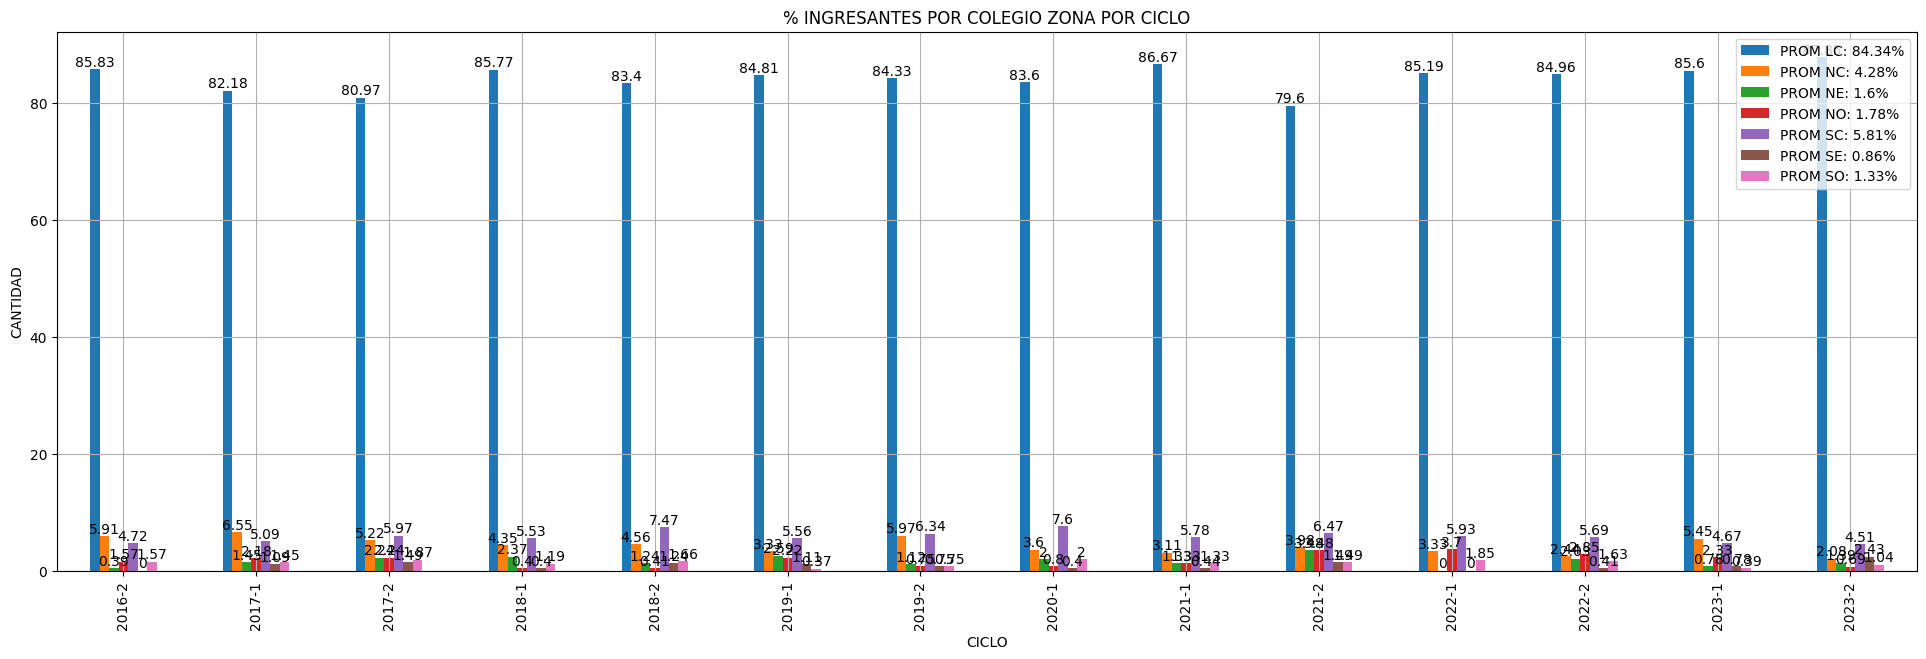

In [23]:
# GRAFICAMOS EL DF RESULTADO CONSIDERANDO LC Y EL RESTO DE REGIONES
ax_czi_df=czi_df['Porcentaje Ingresante'].plot(kind='bar',figsize=(24,7),xlabel='CICLO',ylabel='CANTIDAD',title='% INGRESANTES POR COLEGIO ZONA POR CICLO',grid=True)
prom_czi_lc = str((prom_czi.loc['LC']).round(2))
prom_czi_nc = str((prom_czi.loc['NC']).round(2))
prom_czi_ne = str((prom_czi.loc['NE']).round(2))
prom_czi_no = str((prom_czi.loc['NO']).round(2))
prom_czi_sc = str((prom_czi.loc['SC']).round(2))
prom_czi_se = str((prom_czi.loc['SE']).round(2))
prom_czi_so = str((prom_czi.loc['SO']).round(2))
ax_czi_df.legend(['PROM LC: ' + prom_czi_lc + '%', 'PROM NC: ' + prom_czi_nc + '%', 'PROM NE: ' + prom_czi_ne + '%', 'PROM NO: ' + prom_czi_no + '%', 'PROM SC: ' + prom_czi_sc + '%', 'PROM SE: ' + prom_czi_se + '%', 'PROM SO: ' + prom_czi_so + '%'])
for container in ax_czi_df.containers:
    ax_czi_df.bar_label(container)

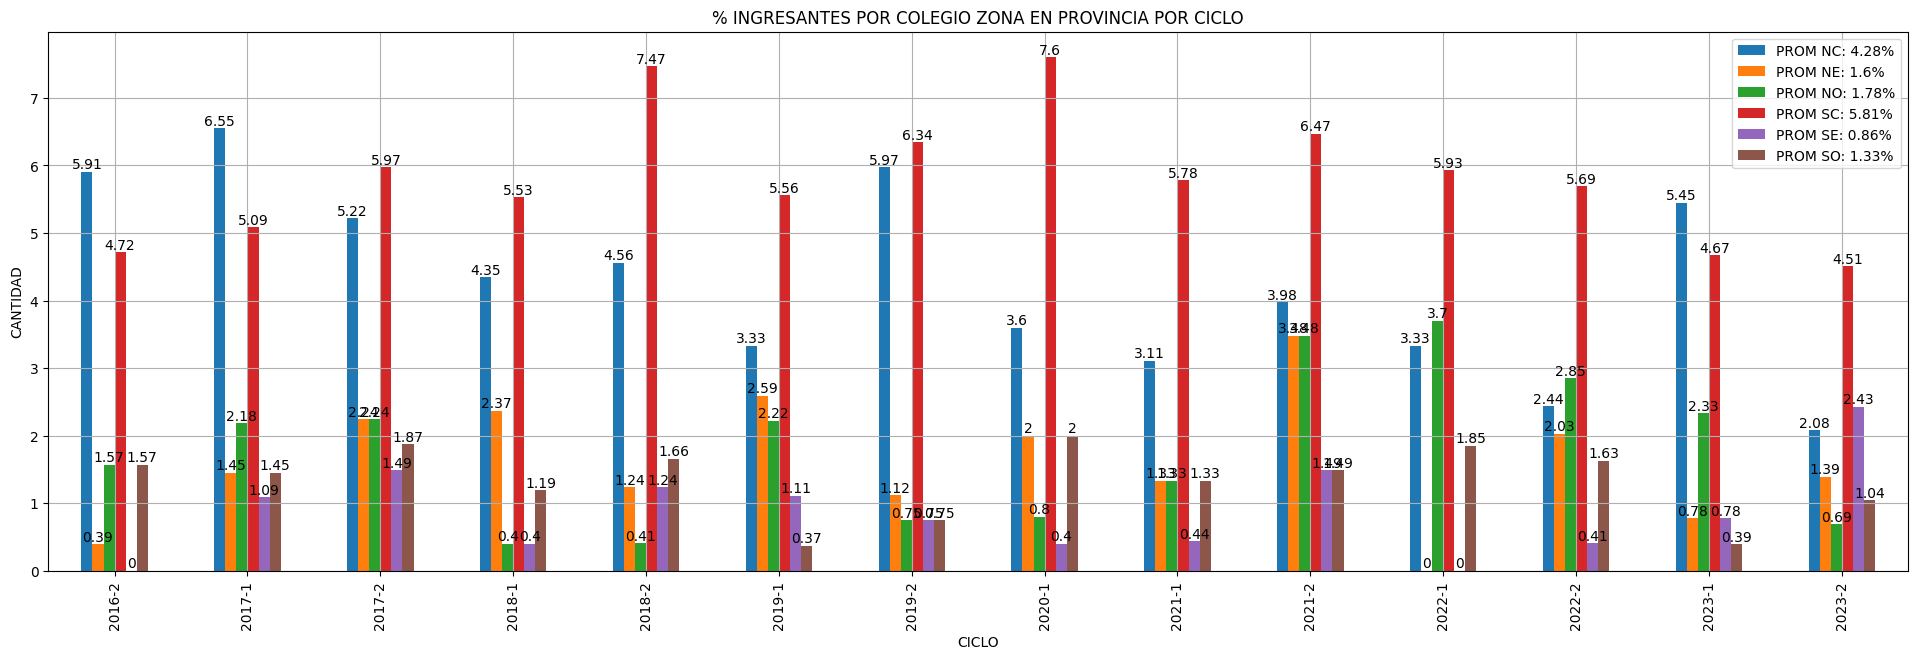

In [24]:
# GRAFICAMOS EL DF RESULTADO CONSIDERANDO EL RESTO DE REGIONES
ax_czip_df=czi_df[[('Porcentaje Ingresante', 'NC'),('Porcentaje Ingresante', 'NE'),('Porcentaje Ingresante', 'NO'),('Porcentaje Ingresante', 'SC'),('Porcentaje Ingresante', 'SE'),('Porcentaje Ingresante', 'SO')]].plot(kind='bar',figsize=(24,7),xlabel='CICLO',ylabel='CANTIDAD',title='% INGRESANTES POR COLEGIO ZONA EN PROVINCIA POR CICLO',grid=True)

ax_czip_df.legend(['PROM NC: ' + prom_czi_nc + '%', 'PROM NE: ' + prom_czi_ne + '%', 'PROM NO: ' + prom_czi_no + '%', 'PROM SC: ' + prom_czi_sc + '%', 'PROM SE: ' + prom_czi_se + '%', 'PROM SO: ' + prom_czi_so + '%'])
for container in ax_czip_df.containers:
    ax_czip_df.bar_label(container)

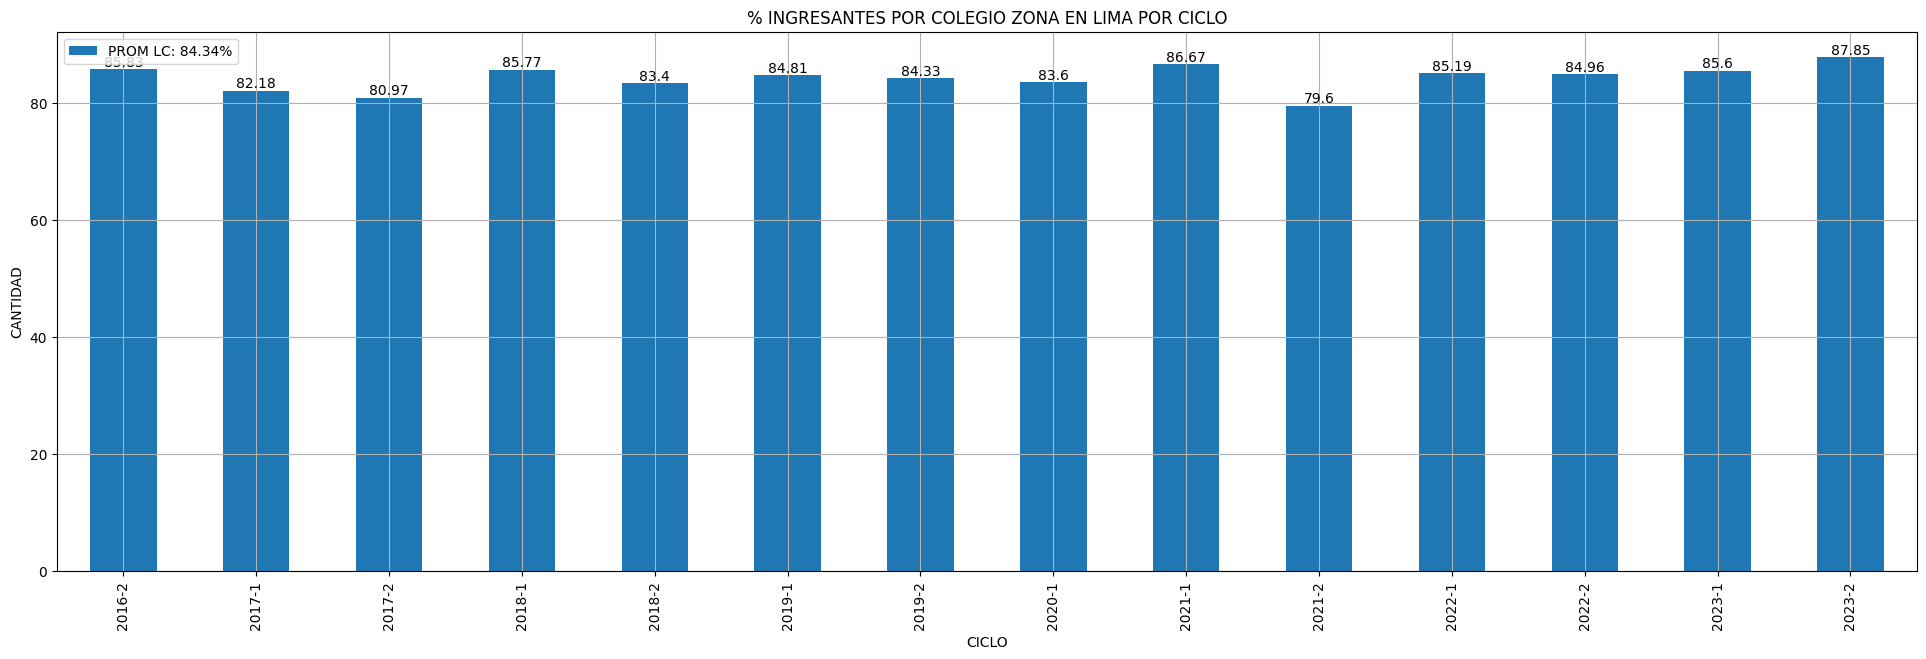

In [25]:
# GRAFICAMOS EL DF RESULTADO CONSIDERANDO LC
ax_czil_df=czi_df[('Porcentaje Ingresante', 'LC')].plot(kind='bar',figsize=(24,7),xlabel='CICLO',ylabel='CANTIDAD',title='% INGRESANTES POR COLEGIO ZONA EN LIMA POR CICLO',grid=True)

ax_czil_df.legend(['PROM LC: ' + prom_czi_lc + '%'])
for container in ax_czil_df.containers:
    ax_czil_df.bar_label(container)